In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sb
 

In [4]:
#Data for Incidence rate 
final_combined_cancer_data = "Resource/final_combined_cancer_data.csv"
final_combined_cancer_data = pd.read_csv(final_combined_cancer_data)
final_combined_cancer_data.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
0,New Mexico,374.3,9116.0,144.0,3514.0
1,Arizona,387.0,30448.0,144.1,11508.0
2,Nevada,392.6,12409.0,162.3,4934.0
3,Wyoming,397.3,2638.0,144.7,943.0
4,Colorado,401.4,22701.0,138.9,7520.0


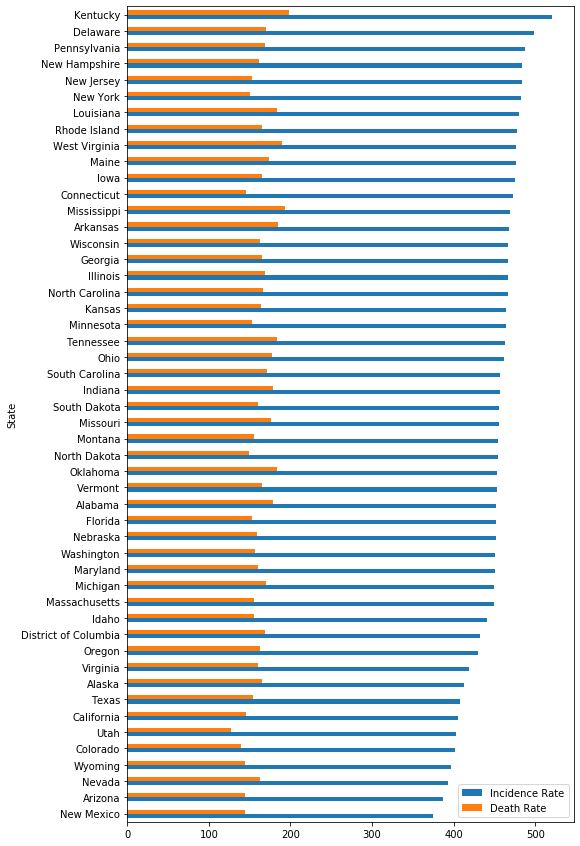

In [5]:
#Bar graph for Inceidence and Death Rate
bx = final_combined_cancer_data.set_index('State')
ax= bx[['Incidence Rate','Death Rate']].plot(kind="barh", figsize=(8,15))

In [6]:
Incidence_Rate = final_combined_cancer_data['Incidence Rate']
Death_Rate = final_combined_cancer_data['Death Rate'] 
quartiles_inc = Incidence_Rate.quantile([.25,.5,.75])
lowerq_inc = round(quartiles_inc[0.25],2)
upperq_inc = round(quartiles_inc[0.75],2)
iqr_inc = round(upperq_inc-lowerq_inc,2)

print(f"The lower quartile of Incidence Rate is:{lowerq_inc}")
print(f"The upper quartile of Incidence Rate is: {upperq_inc}")
print(f"The interquartile range of Incidence Rate is: {iqr_inc}")
print(f"The the median of Incidence Rate is: {quartiles_inc[0.5]} ")

lower_bound_inc = round(lowerq_inc - (1.5*iqr_inc),2)
upper_bound_inc = round(upperq_inc + (1.5*iqr_inc),2)
print(f"Values below {lower_bound_inc} could be outliers.")
print(f"Values above {upper_bound_inc} could be outliers.")

quartiles_dea = Death_Rate.quantile([.25,.5,.75])
lowerq_dea = round(quartiles_dea[0.25],2)
upperq_dea = round(quartiles_dea[0.75],2)
iqr_dea = round(upperq_dea-lowerq_dea,2)

print(f"The lower quartile of Death Rate is:{lowerq_dea}")
print(f"The upper quartile of Death Rate is: {upperq_dea}")
print(f"The interquartile range of Death Rate is: {iqr_dea}")
print(f"The the median of Death Rate is: {quartiles_dea[0.5]} ")

lower_bound_dea = round(lowerq_dea - (1.5*iqr_dea),2)
upper_bound_dea = round(upperq_dea + (1.5*iqr_dea),2)
print(f"Values below {lower_bound_dea} could be outliers.")
print(f"Values above {upper_bound_dea} could be outliers.")
print(Incidence_Rate < lower_bound_inc |(Incidence_Rate > upper_bound_inc)

The lower quartile of Incidence Rate is:442.8
The upper quartile of Incidence Rate is: 468.4
The interquartile range of Incidence Rate is: 25.6
The the median of Incidence Rate is: 455.6 
Values below 404.4 could be outliers.
Values above 506.8 could be outliers.
The lower quartile of Death Rate is:154.2
The upper quartile of Death Rate is: 171.45
The interquartile range of Death Rate is: 17.25
The the median of Death Rate is: 163.5 
Values below 128.32 could be outliers.
Values above 197.32 could be outliers.


In [53]:
#Low Outliers for Incidence rate
low_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Incidence Rate']<=404]
low_outliers

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
0,New Mexico,374.3,9116.0,144.0,3514.0
1,Arizona,387.0,30448.0,144.1,11508.0
2,Nevada,392.6,12409.0,162.3,4934.0
3,Wyoming,397.3,2638.0,144.7,943.0
4,Colorado,401.4,22701.0,138.9,7520.0
5,Utah,402.8,10143.0,127.0,3021.0


In [44]:
#High Outliers for Incidence rate
high_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Incidence Rate']>=506 ]
high_outliers

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
49,Kentucky,520.9,26945.0,197.9,10206.0


In [46]:
#Low Outliers for Death rate
low_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Death Rate']<=128 ]
low_outliers

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
5,Utah,402.8,10143.0,127.0,3021.0


In [47]:
#High Outliers for Incidence rate
high_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Death Rate']>=197 ]
high_outliers

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
49,Kentucky,520.9,26945.0,197.9,10206.0


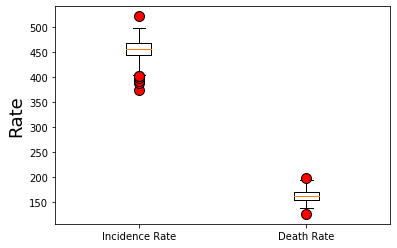

In [33]:
marker_outliers=dict(markerfacecolor='red',markersize=10) 
Incidence_Rate = final_combined_cancer_data['Incidence Rate']
Death_Rate = final_combined_cancer_data['Death Rate']  
plt.boxplot([Incidence_Rate, Death_Rate], labels=['Incidence Rate','Death Rate'], flierprops=marker_outliers)

plt.ylabel("Rate", size= 18)
plt.show()

In [8]:
#Data for Death Rate 
Added_final_combined_cancer_data = "Resource/Added_final_combined_cancer_data.csv"
Added_final_combined_cancer_data = pd.read_csv(Added_final_combined_cancer_data)
Rounded_data = Added_final_combined_cancer_data
Rounded_data.head()


,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,New Mexico,374.0,9116.0,144.0,3514.0,39.0
1,Arizona,387.0,30448.0,144.0,11508.0,38.0
2,Nevada,393.0,12409.0,162.0,4934.0,40.0
3,Wyoming,397.0,2638.0,145.0,943.0,36.0
4,Colorado,401.0,22701.0,139.0,7520.0,33.0


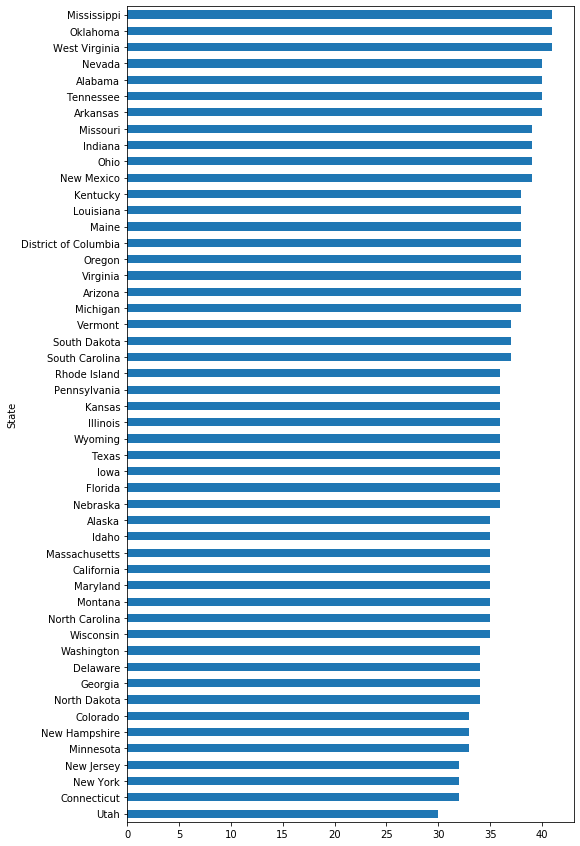

In [9]:
# Bar graph for Cancer Death_per_hundred_Cancer_Patient Rankwise 
bx= Rounded_data.set_index('State')
cx= bx.sort_values("Cancer Death_per_hundred_cancer_patient")                                
 
ax= cx['Cancer Death_per_hundred_cancer_patient'].plot(kind="barh", figsize=(8,15))


The correlation between both factors is -0.05
y = -0.0x + 38.12


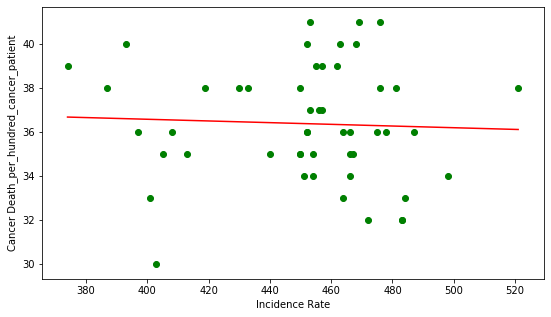

In [10]:
# Scatter plot, correlation, linear regression with Incidence Rate and Cancer Death_per_hundred_cancer_patient 
Rounded_data.plot.scatter(x='Incidence Rate', y='Cancer Death_per_hundred_cancer_patient',figsize=(9,5))
x_axis= Rounded_data["Incidence Rate"] 
y_axis= Rounded_data["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis= Rounded_data["Incidence Rate"] 
y_axis= Rounded_data["Cancer Death_per_hundred_cancer_patient"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Cancer Death_per_hundred_cancer_patient')
plt.show()

In [11]:
#Correlation cofficient
pearsoncorr = Rounded_data.corr(method='pearson')
pearsoncorr

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
Incidence Rate,1.000000,-0.021789,0.593269,-0.030054,-0.045042
Average Annual Count_x,-0.021789,1.000000,-0.147511,0.997122,-0.146855
Death Rate,0.593269,-0.147511,1.000000,-0.109428,0.710124
Average Annual Count_y,-0.030054,0.997122,-0.109428,1.000000,-0.091903
Cancer Death_per_hundred_cancer_patient,-0.045042,-0.146855,0.710124,-0.091903,1.000000


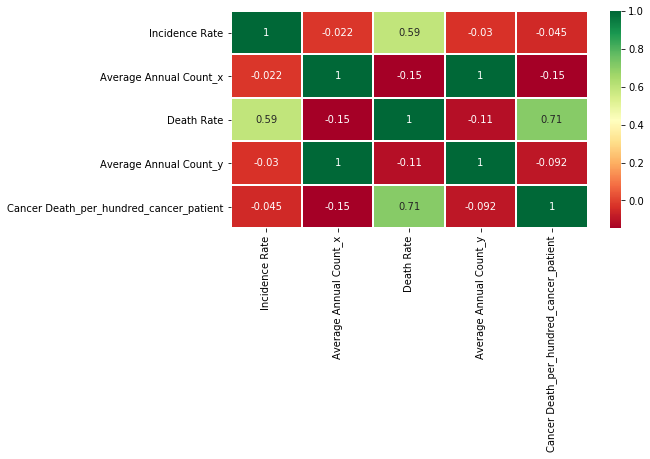

In [12]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

In [13]:
Incidence_gender_metadata = "Resource/New Cancer/USCS_by_Gender.csv" 
Incidence_gender_metadata = pd.read_csv(Incidence_gender_metadata)
Incidence_gender_metadata


,CancerType,Year,Sex,AgeSpecificRate,CaseCount,Population
0,'All Cancer Sites Combined','2012-2016','Female','420.9','4069572','809147519'
1,'All Cancer Sites Combined','2012-2016','Male','488.8','4120977','784148557'


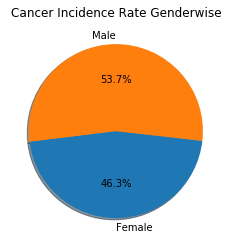

In [14]:

Incidence_data = ['420.9','488.8']
labels = ['Female', 'Male']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]

plt.pie(Incidence_data, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=187)
plt.title("Cancer Incidence Rate Genderwise")
plt.show()


In [15]:
Death_gender_metadata = "Resource/Cancer death/USCS_by_gender.csv" 
Death_gender_metadata = pd.read_csv(Death_gender_metadata)
Death_gender_metadata

,CancerType,Year,Sex,AgeSpecificRate,DeathCount,Population
0,'All Cancer Sites Combined','2012-2016','Female','137.7','1400236','809147519'
1,'All Cancer Sites Combined','2012-2016','Male','193.1','1552879','784148557'


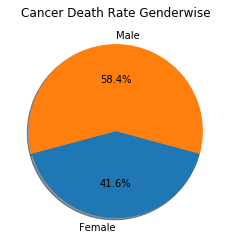

In [16]:
Incidence_data = ['137.7','193.1']
labels = ['Female', 'Male']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]

plt.pie(Incidence_data, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=195)
plt.title("Cancer Death Rate Genderwise")
plt.show()

In [17]:
highlow_cancer_inc_data = "Resource/heighest_lowest_Incidencerate_data.csv"
highlow_cancer_inc_data = pd.read_csv(highlow_cancer_inc_data)
highlow_cancer_inc_data = highlow_cancer_inc_data.set_index('State')
highlow_cancer_inc_data.head()

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
State,,,,
New Mexico,374.3,9116.0,144.0,3514.0
Arizona,387.0,30448.0,144.1,11508.0
Nevada,392.6,12409.0,162.3,4934.0
Wyoming,397.3,2638.0,144.7,943.0
Colorado,401.4,22701.0,138.9,7520.0


In [18]:
pearsoncorr = highlow_cancer_inc_data.corr(method='pearson')
pearsoncorr

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
Incidence Rate,1.000000,-0.030783,0.720920,-0.046467
Average Annual Count_x,-0.030783,1.000000,-0.196962,0.997620
Death Rate,0.720920,-0.196962,1.000000,-0.177413
Average Annual Count_y,-0.046467,0.997620,-0.177413,1.000000


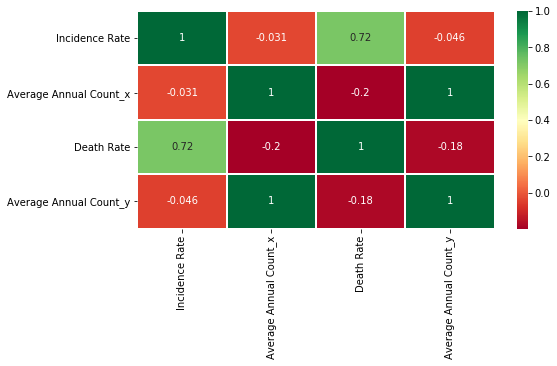

In [19]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

The correlation between both factors is 0.72
y = 0.27x + 38.28


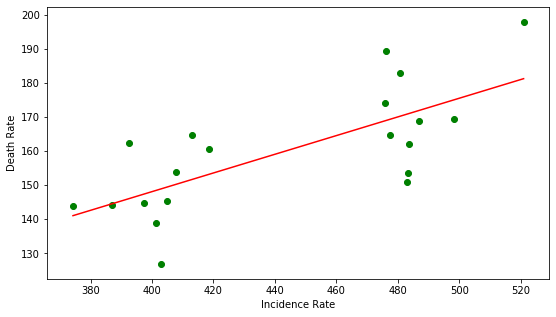

In [20]:
cx = highlow_cancer_inc_data
cx.plot.scatter(x='Incidence Rate', y='Death Rate',figsize=(9,5))
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.show()

In [21]:
highlow_cancer_death_data = "Resource/heighest_lowest_deathrate_data.csv"
highlow_cancer_death_data = pd.read_csv(highlow_cancer_death_data)
highlow_cancer_death_data = highlow_cancer_death_data.set_index('State')
highlow_cancer_death_data.head()

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
State,,,,
Utah,402.8,10143.0,127.0,3021.0
Colorado,401.4,22701.0,138.9,7520.0
New Mexico,374.3,9116.0,144.0,3514.0
Arizona,387.0,30448.0,144.1,11508.0
Wyoming,397.3,2638.0,144.7,943.0


In [22]:
pearsoncorr = highlow_cancer_death_data.corr(method='pearson')
pearsoncorr

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
Incidence Rate,1.000000,0.014886,0.739701,0.017480
Average Annual Count_x,0.014886,1.000000,-0.183753,0.996849
Death Rate,0.739701,-0.183753,1.000000,-0.143580
Average Annual Count_y,0.017480,0.996849,-0.143580,1.000000


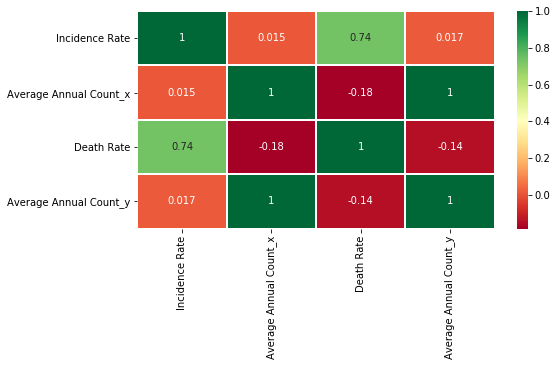

In [23]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

The correlation between both factors is 0.74
y = 0.42x + -24.27


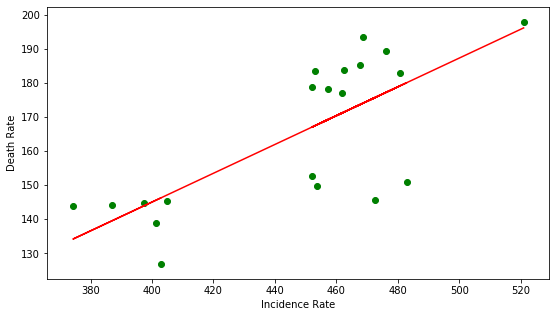

In [24]:
cx = highlow_cancer_death_data
cx.plot.scatter(x='Incidence Rate', y='Death Rate',figsize=(9,5))
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.show()